In [1]:
from datasets import load_dataset

ds = load_dataset("gfissore/arxiv-abstracts-2021")


C:\Users\hashw\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
import torch

In [3]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hashw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hashw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hashw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'abstract', 'report-no', 'categories', 'versions'],
        num_rows: 1999486
    })
})


   ### Converting dataset into a dataframe

In [5]:
# Convert to DataFrame
df_main = ds['train'].to_pandas()

In [6]:
df_main.shape

(1999486, 11)

In [7]:
df_main.head(10)

,id,submitter,authors,title,comments,journal-ref,doi,abstract,report-no,categories,versions
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,A fully differential calculation in perturba...,ANL-HEP-PR-07-12,[hep-ph],"[v1, v2]"
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,"We describe a new algorithm, the $(k,\ell)$-...",None,[math.CO cs.CG],"[v1, v2]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,The evolution of Earth-Moon system is descri...,None,[physics.gen-ph],"[v1, v2, v3]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,We show that a determinant of Stirling cycle...,None,[math.CO],[v1]
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,In this paper we show how to compute the $\L...,None,[math.CA math.FA],[v1]
5,0704.0006,Yue Hin Pong,Y. H. Pong and C. K. Law,Bosonic characters of atomic Cooper pairs acro...,"6 pages, 4 figures, accepted by PRA",None,10.1103/PhysRevA.75.043613,We study the two-particle wave function of p...,None,[cond-mat.mes-hall],[v1]
6,0704.0007,Alejandro Corichi,"Alejandro Corichi, Tatjana Vukasinac and Jose ...",Polymer Quantum Mechanics and its Continuum Limit,"16 pages, no figures. Typos corrected to match...","Phys.Rev.D76:044016,2007",10.1103/PhysRevD.76.044016,A rather non-standard quantum representation...,IGPG-07/03-2,[gr-qc],"[v1, v2]"
7,0704.0008,Damian Swift,Damian C. Swift,Numerical solution of shock and ramp compressi...,Minor corrections,"Journal of Applied Physics, vol 104, 073536 (2...",10.1063/1.2975338,A general formulation was developed to repre...,"LA-UR-07-2051, LLNL-JRNL-410358",[cond-mat.mtrl-sci],"[v1, v2, v3]"
8,0704.0009,Paul Harvey,"Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...","The Spitzer c2d Survey of Large, Nearby, Inste...",None,"Astrophys.J.663:1149-1173,2007",10.1086/518646,We discuss the results from the combined IRA...,None,[astro-ph],[v1]
9,0704.0010,Sergei Ovchinnikov,Sergei Ovchinnikov,"Partial cubes: structures, characterizations, ...","36 pages, 17 figures",None,None,Partial cubes are isometric subgraphs of hyp...,None,[math.CO],[v1]


### Keeping only the Columns required for our Task

In [8]:

# Keep only the required columns
df = df_main[['title', 'abstract', 'categories']]

## Convert 'categories' column from list/array to a string and extract only the primary category

In [9]:
# Convert 'categories' column from list/array to a string with values separated by whitespace
df['categories'] = df['categories'].apply(lambda x: ' '.join(x) if isinstance(x, (list, np.ndarray)) else x)

# Extract the primary category (first category) and update the 'categories' column
df['categories'] = df['categories'].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else None)

# Print unique values in the 'categories' column after modification
unique_categories = df['categories'].unique()

# Print the unique values
print("Unique primary categories:")
print(unique_categories)

# Print the total number of unique primary categories
print("\nTotal number of unique primary categories:", len(unique_categories))


C:\Users\hashw\AppData\Local\Temp\ipykernel_1952\2545365738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categories'] = df['categories'].apply(lambda x: ' '.join(x) if isinstance(x, (list, np.ndarray)) else x)


Unique primary categories:
['hep-ph' 'math.CO' 'physics.gen-ph' 'math.CA' 'cond-mat.mes-hall' 'gr-qc'
 'cond-mat.mtrl-sci' 'astro-ph' 'math.NT' 'hep-th' 'math.PR' 'hep-ex'
 'nlin.PS' 'math.NA' 'cond-mat.str-el' 'math.RA' 'physics.optics'
 'q-bio.PE' 'q-bio.QM' 'math.OA' 'math.QA' 'cond-mat.stat-mech' 'quant-ph'
 'cs.NE' 'physics.ed-ph' 'math.DG' 'cond-mat.soft' 'physics.pop-ph'
 'nucl-th' 'math.FA' 'cs.DS' 'math.AG' 'math.DS' 'physics.soc-ph'
 'math-ph' 'cond-mat.other' 'physics.data-an' 'cs.CE' 'math.GR' 'hep-lat'
 'cond-mat.supr-con' 'nlin.SI' 'cs.IT' 'math.AC' 'math.SG' 'cs.CC'
 'math.GT' 'nlin.CD' 'math.CV' 'math.AP' 'math.RT' 'q-bio.OT'
 'physics.plasm-ph' 'physics.bio-ph' 'nlin.CG' 'cs.DM' 'nucl-ex'
 'physics.flu-dyn' 'physics.comp-ph' 'math.MG' 'physics.atom-ph' 'math.ST'
 'physics.chem-ph' 'math.AT' 'physics.geo-ph' 'q-bio.NC' 'q-fin.RM'
 'cond-mat.dis-nn' 'q-bio.SC' 'q-bio.BM' 'math.OC' 'cs.CR' 'math.LO'
 'cs.NI' 'q-fin.PR' 'physics.class-ph' 'q-fin.GN' 'q-fin.ST' 'cs.PF'
 'st

C:\Users\hashw\AppData\Local\Temp\ipykernel_1952\2545365738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categories'] = df['categories'].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else None)


In [10]:
category_counts = df['categories'].value_counts()
print(category_counts)


categories
hep-ph               119400
hep-th                95479
astro-ph              94246
quant-ph              87454
cond-mat.mes-hall     54691
                      ...  
atom-ph                  68
acc-phys                 46
plasm-ph                 28
ao-sci                   13
bayes-an                 11
Name: count, Length: 172, dtype: int64


Set a general category named 'Other' if the count of records is less than 1000

In [11]:
# Set a threshold for "Other"
threshold = 1000

# Assign "Other" to categories with fewer papers than the threshold
df['categories'] = df['categories'].apply(lambda x: x if category_counts[x] >= threshold else 'Other')

# Verify the new distribution
category_counts = df['categories'].value_counts()
print(category_counts)


categories
hep-ph               119400
hep-th                95479
astro-ph              94246
quant-ph              87454
cond-mat.mes-hall     54691
                      ...  
q-fin.MF               1128
physics.atm-clus       1113
cs.NA                  1083
q-fin.PR               1064
cs.SC                  1008
Name: count, Length: 142, dtype: int64


C:\Users\hashw\AppData\Local\Temp\ipykernel_1952\3258524472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categories'] = df['categories'].apply(lambda x: x if category_counts[x] >= threshold else 'Other')


In [12]:
unique_primary_categories = df['categories'].unique()

# Print the unique primary categories and their count
print("Unique primary categories:")
print(unique_primary_categories)
print("\nTotal number of unique primary categories:", len(unique_primary_categories))

Unique primary categories:
['hep-ph' 'math.CO' 'physics.gen-ph' 'math.CA' 'cond-mat.mes-hall' 'gr-qc'
 'cond-mat.mtrl-sci' 'astro-ph' 'math.NT' 'hep-th' 'math.PR' 'hep-ex'
 'nlin.PS' 'math.NA' 'cond-mat.str-el' 'math.RA' 'physics.optics'
 'q-bio.PE' 'q-bio.QM' 'math.OA' 'math.QA' 'cond-mat.stat-mech' 'quant-ph'
 'cs.NE' 'physics.ed-ph' 'math.DG' 'cond-mat.soft' 'physics.pop-ph'
 'nucl-th' 'math.FA' 'cs.DS' 'math.AG' 'math.DS' 'physics.soc-ph'
 'math-ph' 'cond-mat.other' 'physics.data-an' 'cs.CE' 'math.GR' 'hep-lat'
 'cond-mat.supr-con' 'nlin.SI' 'cs.IT' 'math.AC' 'math.SG' 'cs.CC'
 'math.GT' 'nlin.CD' 'math.CV' 'math.AP' 'math.RT' 'Other'
 'physics.plasm-ph' 'physics.bio-ph' 'cs.DM' 'nucl-ex' 'physics.flu-dyn'
 'physics.comp-ph' 'math.MG' 'physics.atom-ph' 'math.ST' 'physics.chem-ph'
 'math.AT' 'physics.geo-ph' 'q-bio.NC' 'cond-mat.dis-nn' 'q-bio.BM'
 'math.OC' 'cs.CR' 'math.LO' 'cs.NI' 'q-fin.PR' 'physics.class-ph'
 'q-fin.GN' 'q-fin.ST' 'stat.ME' 'math.GM' 'math.KT' 'physics.atm-clus

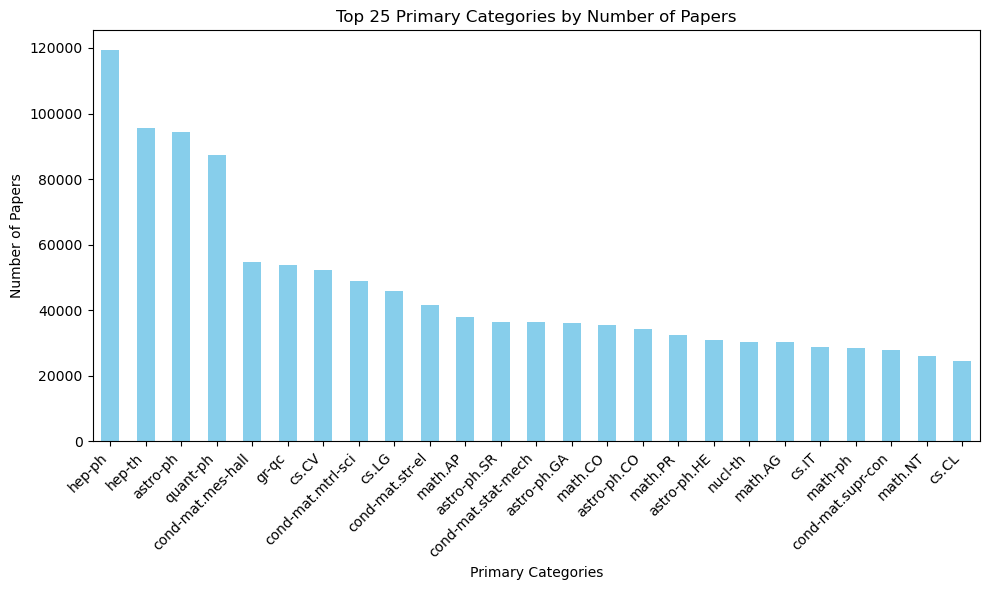

In [13]:
import matplotlib.pyplot as plt

# Get the top N categories (e.g., top 10)
top_n = 25
top_categories = category_counts.head(top_n)

# Plot the top N categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Primary Categories by Number of Papers')
plt.xlabel('Primary Categories')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
# Get the top 25 categories by count
top_25_categories = category_counts.head(25)

# Print the top 25 categories and their counts
print("Top 25 categories and their counts:")
print(top_25_categories)


Top 25 categories and their counts:
categories
hep-ph                119400
hep-th                 95479
astro-ph               94246
quant-ph               87454
cond-mat.mes-hall      54691
gr-qc                  53919
cs.CV                  52308
cond-mat.mtrl-sci      49011
cs.LG                  45816
cond-mat.str-el        41671
math.AP                37938
astro-ph.SR            36377
cond-mat.stat-mech     36307
astro-ph.GA            35963
math.CO                35571
astro-ph.CO            34287
math.PR                32468
astro-ph.HE            31036
nucl-th                30368
math.AG                30204
cs.IT                  28752
math-ph                28544
cond-mat.supr-con      28015
math.NT                26163
cs.CL                  24667
Name: count, dtype: int64


## Filter the dataframe to hold only top 25 category for our analysis

In [15]:
# Filter the DataFrame for top 25 categories
df = df[df['categories'].isin(top_25_categories.index)]

# Check the filtered DataFrame
print(top_25_categories.head())


categories
hep-ph               119400
hep-th                95479
astro-ph              94246
quant-ph              87454
cond-mat.mes-hall     54691
Name: count, dtype: int64


In [16]:
df.shape

(1170655, 3)

In [17]:
df['categories'].nunique()

25

## Downsampling the dataset

In [18]:
df= df.sample(frac=0.25, random_state=42)

In [19]:
df.shape

(292664, 3)

In [20]:
# Check GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cuda


## Data Cleaning and Pre-processing


In [21]:
# Shell 2: Data Cleaning and Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and stem
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    # Join back into a single string
    return ' '.join(tokens)

# Apply preprocessing to title and abstract
df['cleaned_title'] = df['title'].apply(preprocess_text)
df['cleaned_abstract'] = df['abstract'].apply(preprocess_text)

# Save the cleaned data for EDA and further processing
df.to_csv("cleaned_dataset.csv", index=False)
print("Preprocessing completed and saved.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hashw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hashw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Preprocessing completed and saved.


In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## EDA

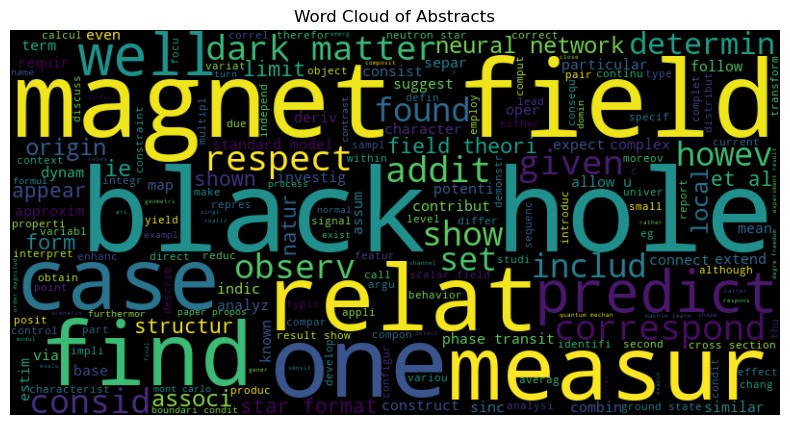

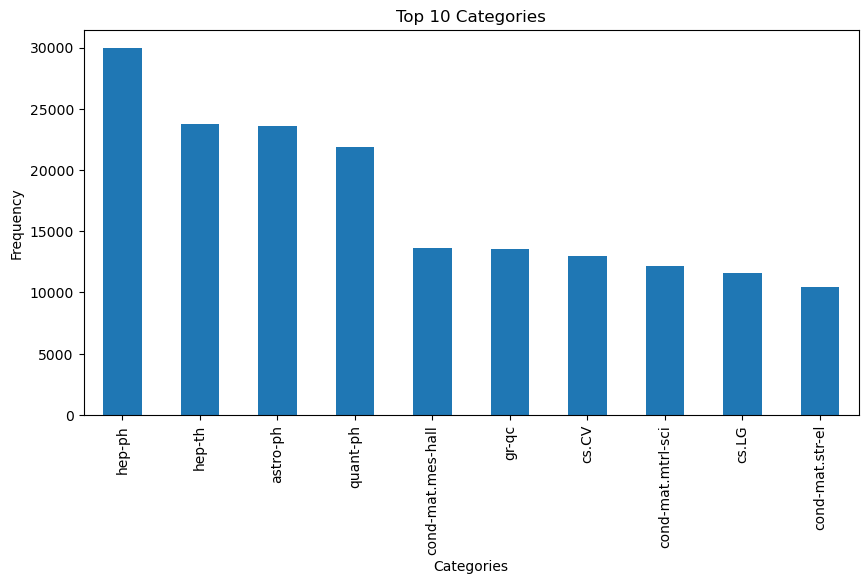

In [23]:
# Shell 3: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Word Cloud for Abstracts
abstract_text = " ".join(df['cleaned_abstract'])
wordcloud = WordCloud(width=800, height=400).generate(abstract_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Abstracts")
plt.show()

# Top Categories Bar Chart
category_counts = df['categories'].value_counts()
plt.figure(figsize=(10, 5))
category_counts.head(10).plot(kind='bar')
plt.title("Top 10 Categories")
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.show()


## Recommendation Engine using BERT


In [24]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Shell 4: Recommendation Engine Using BERT
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Function to compute BERT embeddings
def compute_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).cpu().numpy()

# Compute embeddings for all abstracts
df['abstract_embedding'] = df['cleaned_abstract'].apply(lambda x: compute_embedding(x)[0])

# Recommendation function
def recommend(query, top_k=5):
    query_embedding = compute_embedding(query)[0]
    similarities = df['abstract_embedding'].apply(lambda x: cosine_similarity([query_embedding], [x]).item())
    df['similarity'] = similarities
    return df.sort_values(by='similarity', ascending=False).head(top_k)[['title', 'similarity']]

# Test the recommendation engine
query = "machine learning for physics simulations"
recommendations = recommend(query)
print(recommendations)


                                                     title  similarity
1800442                                  QCD Phenomenology    0.706078
1985684                    Quantum Artificial Intelligence    0.702585
1947201  Doorway states for one-nucleon transfer reacti...    0.700614
1853471                    Quantum Field Theory: Spin Zero    0.682435
1893827      Integration motivique sur les schemas formels    0.677399


## Subject Area Classification

In [26]:
df.head()

,title,abstract,categories,cleaned_title,cleaned_abstract,abstract_embedding,similarity
428156,Pion transition form factor in the constituent...,We calculate the transition form factor of t...,hep-ph,pion transit form factor constitu quark model,calcul transit form factor neutral pion one ph...,"[-0.40784585, 0.017525868, 0.3895783, -0.08837...",0.458130
146916,Unified interpretation of cosmic-ray nuclei an...,"We use our numerical code, DRAGON, to study ...",astro-ph.HE,unifi interpret cosmicray nuclei antiproton re...,use numer code dragon studi implic recent data...,"[-0.17767027, -0.03442928, 0.47775853, 0.02651...",0.404694
161127,Emission line taxonomy and the nature of AGN-l...,Massive spectroscopic surveys like the SDSS ...,astro-ph.CO,emiss line taxonomi natur agnlook galaxi sdss,massiv spectroscop survey like sdss revolution...,"[-0.33443964, -0.09959191, 0.62929446, -0.0176...",0.378439
1414771,Holographic entanglement negativity and replic...,"Since the work of Ryu and Takayanagi, deep c...",hep-th,holograph entangl neg replica symmetri break,sinc work ryu takayanagi deep connect quantum ...,"[-0.30637953, -0.19353391, 0.39352795, -0.0376...",0.423119
1794267,Parton and dipole approaches in QCD,"Here, we discuss QCD predictions on multipli...",hep-ph,parton dipol approach qcd,discuss qcd predict multipl parton dipol appro...,"[-0.1794696, -0.34474012, 0.42568702, -0.12440...",0.435135


In [27]:
df.shape


(292664, 7)

In [28]:
df['categories'].unique()

array(['hep-ph', 'astro-ph.HE', 'astro-ph.CO', 'hep-th', 'math.NT',
       'math-ph', 'astro-ph', 'math.CO', 'cond-mat.mes-hall',
       'cond-mat.stat-mech', 'quant-ph', 'astro-ph.SR',
       'cond-mat.supr-con', 'math.AG', 'cs.LG', 'math.PR',
       'cond-mat.str-el', 'cond-mat.mtrl-sci', 'gr-qc', 'cs.IT',
       'astro-ph.GA', 'math.AP', 'cs.CV', 'nucl-th', 'cs.CL'],
      dtype=object)

# Classification Task

In [29]:
# Combine cleaned_title and cleaned_abstract if needed
df['combined_text'] = df['cleaned_title'] + " " + df['cleaned_abstract']


In [30]:
df.shape

(292664, 8)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report



# Encode the categories into numerical labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['categories'])

# Text vectorization (TF-IDF)
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df['combined_text'])
y = df['category_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (234131, 10000)
Shape of X_test: (58533, 10000)


In [32]:
X_train

<234131x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 13185165 stored elements in Compressed Sparse Row format>

In [33]:
# Initialize a DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

def add_metrics(df, model_name, accuracy, precision, recall, f1):
    new_metrics = pd.DataFrame([[model_name, accuracy, precision, recall, f1]],
                                columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
    return pd.concat([df, new_metrics], ignore_index=True)

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Metrics:")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))



Logistic Regression Metrics:
                    precision    recall  f1-score   support

          astro-ph       0.63      0.70      0.66      4679
       astro-ph.CO       0.65      0.47      0.54      1757
       astro-ph.GA       0.66      0.60      0.63      1771
       astro-ph.HE       0.67      0.63      0.65      1559
       astro-ph.SR       0.70      0.69      0.69      1782
 cond-mat.mes-hall       0.71      0.73      0.72      2744
 cond-mat.mtrl-sci       0.74      0.73      0.74      2557
cond-mat.stat-mech       0.71      0.74      0.72      1788
   cond-mat.str-el       0.74      0.69      0.71      2133
 cond-mat.supr-con       0.83      0.81      0.82      1370
             cs.CL       0.93      0.90      0.92      1249
             cs.CV       0.90      0.90      0.90      2602
             cs.IT       0.90      0.89      0.90      1441
             cs.LG       0.83      0.87      0.85      2370
             gr-qc       0.74      0.77      0.76      2715
         

In [35]:
from sklearn.metrics import accuracy_score

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Overall Accuracy: {accuracy:.2f}")

Overall Accuracy: 0.78


In [36]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='macro')
print(f"Macro average Precision: {precision:.2f}")
print(f"Macro average Recall: {recall:.2f}")
print(f"Macro average F1-Score: {f1:.2f}")

# Storing the metrics of Logistic Regression
metrics_df = add_metrics(metrics_df, 'Logistic Regression', accuracy, precision, recall, f1)

Macro average Precision: 0.78
Macro average Recall: 0.77
Macro average F1-Score: 0.77


C:\Users\hashw\AppData\Local\Temp\ipykernel_1952\1138964707.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, new_metrics], ignore_index=True)


In [37]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


## XGBoost

In [38]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
svd = TruncatedSVD(n_components=500, random_state=42)  # Adjust components based on memory and dataset size
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)
from sklearn.decomposition import TruncatedSVD

# Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# XGBoost Model with GPU
xgb_model = XGBClassifier(
    eval_metric='logloss', 
    tree_method='hist', 
    device='cuda',  # Use GPU
    scale_pos_weight=class_weights_dict
)

# Train the model
xgb_model.fit(X_train_reduced, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_reduced)

# Performance Metrics
print("XGBoost Metrics:")
print(classification_report(y_test, y_pred, zero_division=0, target_names=label_encoder.classes_))


C:\Users\hashw\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:28:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\hashw\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


XGBoost Metrics:
                    precision    recall  f1-score   support

          astro-ph       0.53      0.61      0.57      4679
       astro-ph.CO       0.56      0.40      0.47      1757
       astro-ph.GA       0.57      0.52      0.55      1771
       astro-ph.HE       0.58      0.52      0.55      1559
       astro-ph.SR       0.64      0.63      0.64      1782
 cond-mat.mes-hall       0.65      0.65      0.65      2744
 cond-mat.mtrl-sci       0.67      0.66      0.67      2557
cond-mat.stat-mech       0.60      0.61      0.61      1788
   cond-mat.str-el       0.65      0.61      0.63      2133
 cond-mat.supr-con       0.79      0.76      0.78      1370
             cs.CL       0.90      0.84      0.87      1249
             cs.CV       0.87      0.86      0.87      2602
             cs.IT       0.88      0.87      0.87      1441
             cs.LG       0.77      0.84      0.80      2370
             gr-qc       0.68      0.70      0.69      2715
            hep-ph    

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print overall metrics
print("Overall Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

#Storing the metrics of XGBoost
metrics_df = add_metrics(metrics_df, 'XGBoost', accuracy, precision, recall, f1)

Overall Model Performance:
Accuracy: 0.72
Precision: 0.71
Recall: 0.72
F1-Score: 0.71


## CNN

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf


# Train-Test Split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_encoded['text'], df_encoded['label_encoded'], test_size=0.2, random_state=42
)

# Tokenization
MAX_VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(train_texts)

X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

# Convert labels to categorical format
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# CNN Model Building
with tf.device('/GPU:0'):  # Explicitly specify GPU usage
    model = Sequential([
        Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQUENCE_LENGTH),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(y_train.shape[1], activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Training
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=5, verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Classification Report
target_names = label_encoder.inverse_transform(np.arange(len(label_encoder.classes_)))
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=target_names))

# Overall Accuracy
print(f"\nOverall Accuracy: {accuracy_score(y_true_labels, y_pred_labels):.4f}")

C:\Users\hashw\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 50s 13ms/step - accuracy: 0.5310 - loss: 1.4593 - val_accuracy: 0.7475 - val_loss: 0.7017
Epoch 2/5
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 52s 14ms/step - accuracy: 0.7578 - loss: 0.6902 - val_accuracy: 0.7580 - val_loss: 0.6715
Epoch 3/5
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - accuracy: 0.7983 - loss: 0.5686 - val_accuracy: 0.7622 - val_loss: 0.6923
Epoch 4/5
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 86s 23ms/step - accuracy: 0.8305 - loss: 0.4741 - val_accuracy: 0.7578 - val_loss: 0.7335
Epoch 5/5
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 95s 26ms/step - accuracy: 0.8595 - loss: 0.3843 - val_accuracy: 0.7547 - val_loss: 0.8205
Test Loss: 0.8205, Test Accuracy: 0.7547
1830/1830 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

Classification Report:
                    precision    recall  f1-score   support

          astro-ph       0.61      0.67      0.64      4679
       astro-ph.CO       0.53      0.50      0.52      1757
       astro-ph.GA       0.62      0.48      0.54      1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate overall performance metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Print overall performance metrics
print("\nOverall Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

#Storing the metrics of CNN
metrics_df = add_metrics(metrics_df, 'CNN', accuracy, precision, recall, f1)

## MLP Classifier

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

# Create and train MLP classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    max_iter=20,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=True
)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test_scaled)

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_mlp, target_names=label_encoder.classes_))

# Overall metrics
accuracy = accuracy_score(y_test, y_pred_mlp)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_mlp, average='weighted')

print("\nOverall Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

# Training loss
print(f"\nFinal Training Loss: {mlp.loss_:.4f}")
print(f"Number of iterations: {mlp.n_iter_}")

#Storing the metrics of MLP Classifier
metrics_df = add_metrics(metrics_df, 'MLP Classifier', accuracy, precision, recall, f1)

Iteration 1, loss = 1.84803472
Validation score: 0.609934
Iteration 2, loss = 1.20025955
Validation score: 0.648885
Iteration 3, loss = 1.10032125
Validation score: 0.657384
Iteration 4, loss = 1.02655702
Validation score: 0.670325
Iteration 5, loss = 0.96323976
Validation score: 0.674383
Iteration 6, loss = 0.90361749
Validation score: 0.668745
Iteration 7, loss = 0.84616704
Validation score: 0.666781
Iteration 8, loss = 0.79684501
Validation score: 0.669087
Iteration 9, loss = 0.74806451
Validation score: 0.668617
Iteration 10, loss = 0.70668540
Validation score: 0.664688
Iteration 11, loss = 0.66668236
Validation score: 0.667976
Iteration 12, loss = 0.62746514
Validation score: 0.668745
Iteration 13, loss = 0.59147995
Validation score: 0.660630
Iteration 14, loss = 0.56137697
Validation score: 0.660460
Iteration 15, loss = 0.53295701
Validation score: 0.662552
Iteration 16, loss = 0.50563412
Validation score: 0.660246
Validation score did not improve more than tol=0.000100 for 10 co

C:\Users\hashw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Overall Metrics:
Accuracy: 0.6746
Weighted Precision: 0.7731
Weighted Recall: 0.7074
Weighted F1-score: 0.7352

Final Training Loss: 0.5056
Number of iterations: 16


In [45]:
pip show tensorflow


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\hashw\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: tf_keras
Note: you may need to restart the kernel to use updated packages.


In [46]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))


Num GPUs Available:  0
[]
